# <span style="color:BLUE"> OBI-BUTTERFLY_CLASSIFICATION

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
from tensorflow.keras.models import Model

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = r"C:\Users\soume\NEW\Task for Soumen\butterfly classification-20230428T100214Z-001\butterfly classification\butterfly_classification_ai_challenge-dataset\butterfly_classification_ai_challenge-dataset\DATA\TRAIN"
valid_path = r"C:\Users\soume\NEW\Task for Soumen\butterfly classification-20230428T100214Z-001\butterfly classification\butterfly_classification_ai_challenge-dataset\butterfly_classification_ai_challenge-dataset\DATA\VAL"

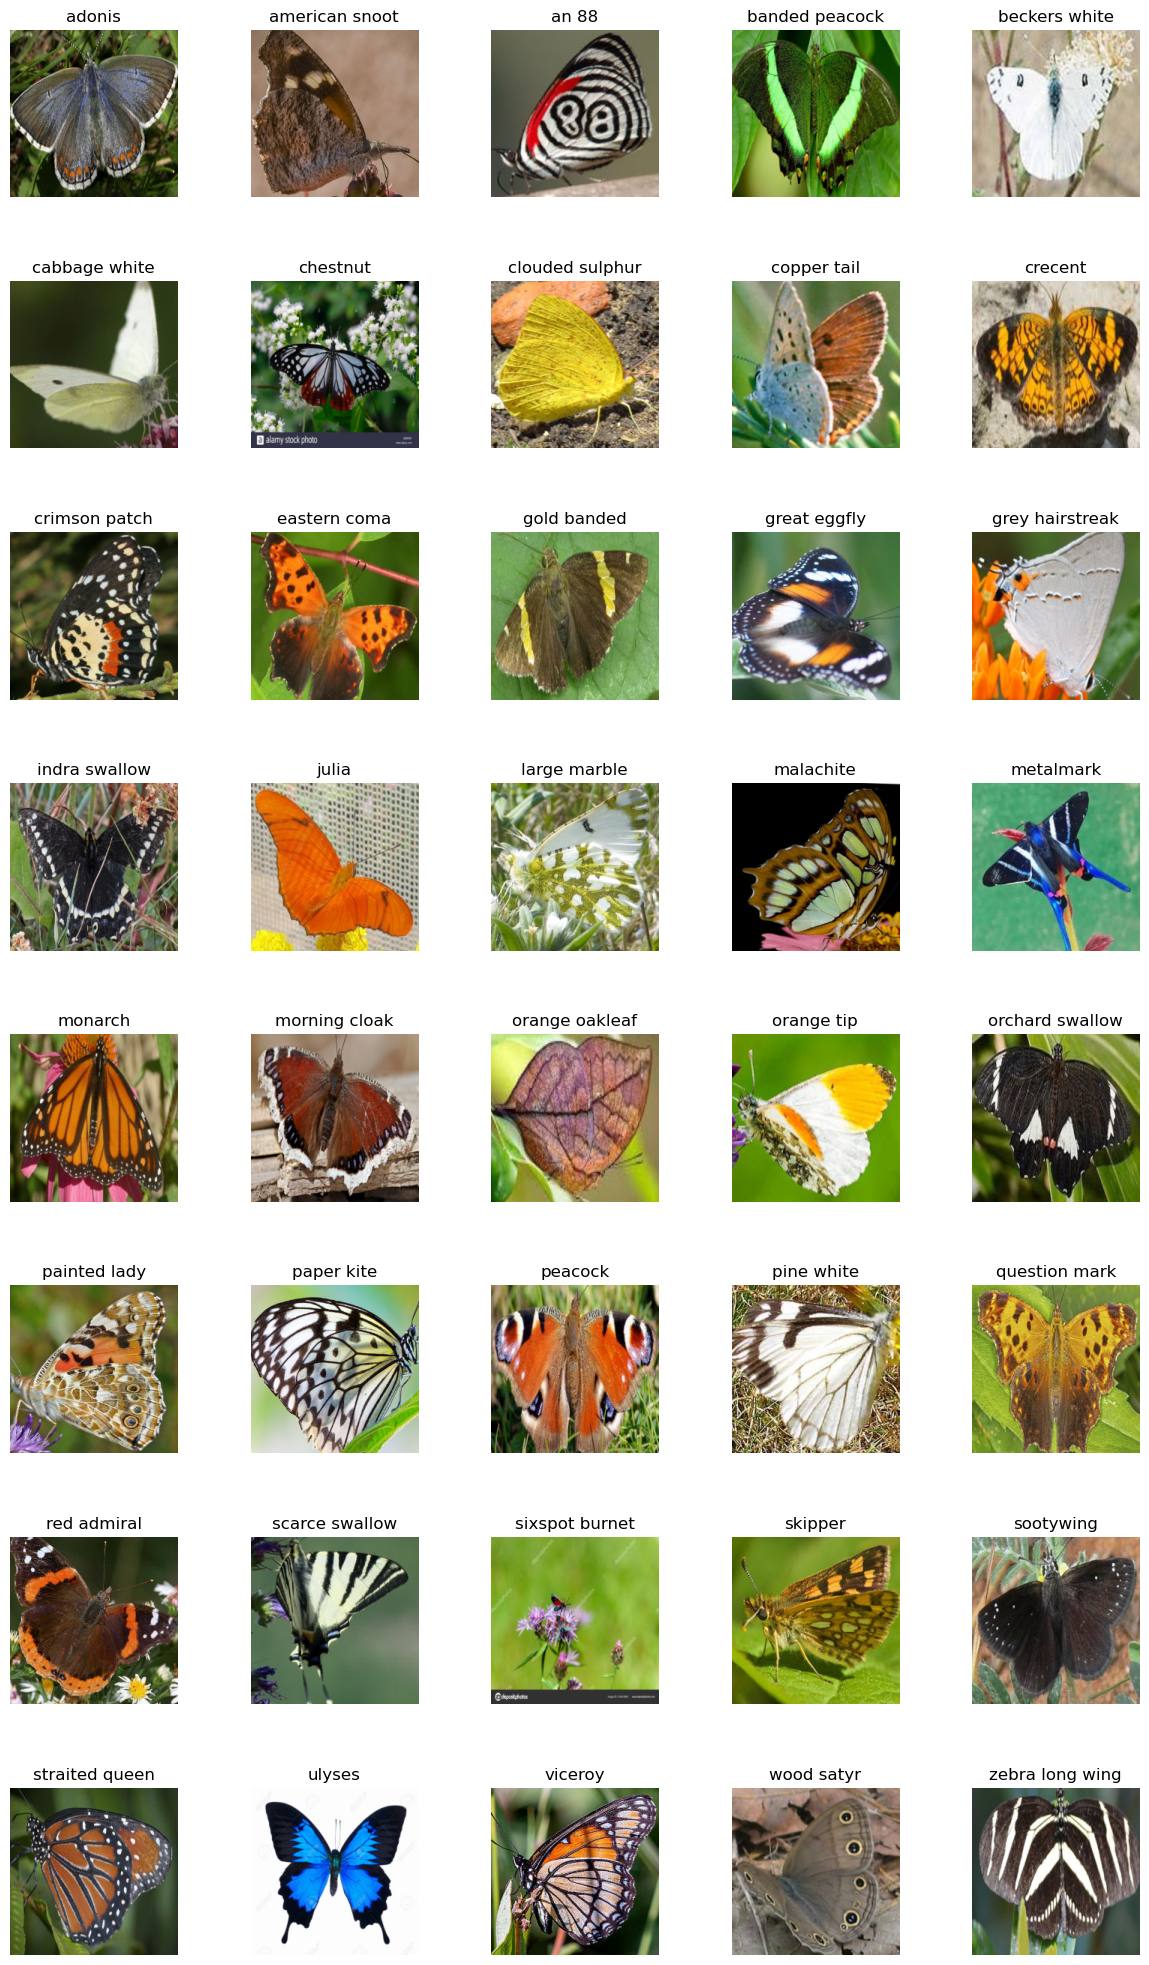

In [3]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
from skimage.transform import resize

IMAGE_SIZE = [224, 224]
train_path = r"C:\Users\soume\NEW\Task for Soumen\butterfly classification-20230428T100214Z-001\butterfly classification\butterfly_classification_ai_challenge-dataset\butterfly_classification_ai_challenge-dataset\DATA\TRAIN"

# Get list of class names
class_names = os.listdir(train_path)

# Create grid of subplots
n_rows = 8  # Number of rows in grid
n_cols = 5  # Number of columns in grid
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 25))

# Plot one image from each class
for i, class_name in enumerate(class_names):
    # Get path to first image in class
    img_path = os.path.join(train_path, class_name, os.listdir(os.path.join(train_path, class_name))[0])
    
    # Load and resize image
    img = imread(img_path)
    img_resized = resize(img, IMAGE_SIZE)
    
    # Show image and class name as title
    row = i // n_cols
    col = i % n_cols
    axs[row, col].imshow(img_resized)
    axs[row, col].set_title(class_name)
    axs[row, col].axis('off')

plt.subplots_adjust(hspace=0.5)  # Add vertical space between rows
plt.show()

In [4]:
  # useful for getting number of output classes
folders = glob(r'C:\Users\soume\NEW\Task for Soumen\butterfly classification-20230428T100214Z-001\butterfly classification\butterfly_classification_ai_challenge-dataset\butterfly_classification_ai_challenge-dataset\DATA\TRAIN/*')

In [5]:
len(folders)

40

In [6]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(r"C:\Users\soume\NEW\Task for Soumen\butterfly classification-20230428T100214Z-001\butterfly classification\butterfly_classification_ai_challenge-dataset\butterfly_classification_ai_challenge-dataset\DATA\TRAIN",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3651 images belonging to 40 classes.


In [8]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# set data path
data_dir = r"C:\Users\soume\NEW\Task for Soumen\butterfly classification-20230428T100214Z-001\butterfly classification\butterfly_classification_ai_challenge-dataset\butterfly_classification_ai_challenge-dataset\DATA\TRAIN"

# set image size
img_size = 224

# define data generator with data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2 # set validation split
)

In [9]:
# load data with data generator
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical',
    subset='training' # set subset to training
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical',
    subset='validation' # set subset to validation
)


Found 2936 images belonging to 40 classes.
Found 715 images belonging to 40 classes.


In [10]:
# define VGG16 model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
vgg = VGG16(include_top=False, input_shape=(img_size, img_size, 3), weights='imagenet')

# freeze all layers in the VGG16 base model
for layer in vgg.layers:
    layer.trainable = False
    print(layer.name,layer.trainable)
    


input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [11]:
# add custom classifier on top of the frozen VGG16 base model
x = Flatten()(vgg.output)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
pred = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=pred)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
# define optimizer and loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_fn = tf.keras.losses.CategoricalCrossentropy()

# compile the model
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

# define callbacks for early stopping and saving best model
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
# train the model
history = model.fit(
    train_data,
    epochs=15,
    validation_data=val_data,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/15
92/92 [==============================] - 501s 5s/step - loss: 2.8932 - accuracy: 0.4271 - val_loss: 1.0817 - val_accuracy: 0.7203
Epoch 2/15
92/92 [==============================] - 500s 5s/step - loss: 0.6429 - accuracy: 0.8185 - val_loss: 0.7365 - val_accuracy: 0.7874
Epoch 3/15
92/92 [==============================] - 513s 6s/step - loss: 0.3921 - accuracy: 0.8822 - val_loss: 0.6206 - val_accuracy: 0.8462
Epoch 4/15
92/92 [==============================] - 501s 5s/step - loss: 0.2297 - accuracy: 0.9332 - val_loss: 0.7388 - val_accuracy: 0.8084
Epoch 5/15
92/92 [==============================] - 502s 5s/step - loss: 0.1969 - accuracy: 0.9435 - val_loss: 0.5892 - val_accuracy: 0.8406
Epoch 6/15
92/92 [==============================] - 520s 6s/step - loss: 0.1279 - accuracy: 0.9649 - val_loss: 0.5489 - val_accuracy: 0.8559
Epoch 7/15
92/92 [==============================] - 501s 5s/step - loss: 0.1126 - accuracy: 0.9649 - val_loss: 0.6225 - val_accuracy: 0.8392
Epoch 8/15
92

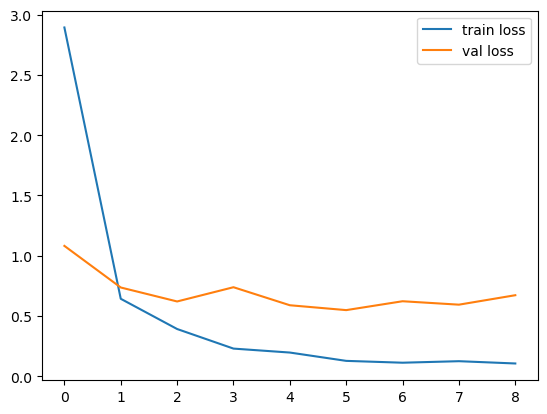

<Figure size 640x480 with 0 Axes>

In [18]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

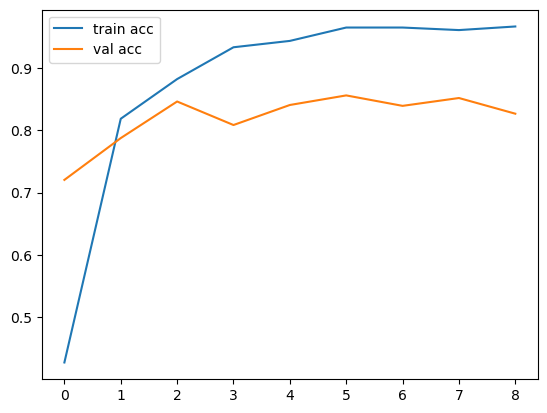

<Figure size 640x480 with 0 Axes>

In [19]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
import os
import random
import csv
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('best_model.h5')

# Define the path to the test directory
test_dir = r'C:\Users\soume\NEW\Task for Soumen\butterfly classification-20230428T100214Z-001\butterfly classification\butterfly_classification_ai_challenge-dataset\butterfly_classification_ai_challenge-dataset\DATA\TEST\New folder'

# Get a list of all image file names in the test directory
img_file_names = os.listdir(test_dir)

# Randomly select 50 image file names from the list
random.seed(5)  # Set a seed for reproducibility
selected_img_file_names = random.sample(img_file_names, 50)

# Create a list to store the image names and predicted classes
results = []

In [21]:
# Define the training directory
train_dir = r'C:\Users\soume\NEW\Task for Soumen\butterfly classification-20230428T100214Z-001\butterfly classification\butterfly_classification_ai_challenge-dataset\butterfly_classification_ai_challenge-dataset\DATA\TRAIN'

# Use flow_from_directory to get the class names and their corresponding indices
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Make sure the order is preserved
)

class_names = list(train_generator.class_indices.keys())

# Loop over the selected image file names
for img_file_name in selected_img_file_names:
    # Load the image and preprocess it
    img_path = os.path.join(test_dir, img_file_name)
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize pixel values to [0, 1]

    # Make a prediction using the model
    pred = model.predict(img)[0]
    pred_class_num = np.argmax(pred)
    pred_class_name = class_names[pred_class_num]

    # Add the image name and predicted class to the results list
    results.append((img_file_name, pred_class_name))


Found 3651 images belonging to 40 classes.
1/1 [==============================] - 0s 131ms/step


In [22]:
# Save the results to a CSV file
with open('Final_Predicted_result.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['image_name', 'predicted_class'])
    writer.writerows(results)


# <span style="color:RED">THANK YOU